# Сборный проект №1

## Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## План выполнения проекта

1. [**Откройте файл с данными и изучите общую информацию.**](#step1) Путь к файлу: <i>/datasets/games.csv</i>.
1. [**Подготовьте данные:**](#step2)
    - [Замените названия столбцов.](#step2_1) Приведите к нижнему регистру;
    - [Преобразуйте данные в нужные типы.](#step2_2) Опишите, в каких столбцах заменили тип данных и почему;
    - [Обработайте пропуски при необходимости.](#step2_3) Объясните, почему заполнили пропуски определённым образом или почему не стали это делать. Опишите причины, которые могли привести к пропускам. Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
    - [Посчитайте суммарные продажи во всех регионах.](#step2_4) Запишите их в отдельный столбец.
1. [**Проведите исследовательский анализ данных:**](#step3)
    - [Посмотрите, сколько игр выпускалось в разные годы.](#step3_1) Важны ли данные за все периоды?
    - [Посмотрите, как менялись продажи по платформам.](#step3_2) Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    - [Возьмите данные за соответствующий актуальный период.](#step3_3) Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
    - [Какие платформы лидируют по продажам, растут или падают?](#step3_4) Выберите несколько потенциально прибыльных платформ.
    - [Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.](#step3_5) Опишите результат.
    - [Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.](#step3_6) Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    - [Соотнесите выводы с продажами игр на других платформах.](#step3_7)
    - [Посмотрите на общее распределение игр по жанрам.](#step3_8) Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
1. [**Составьте портрет пользователя каждого региона.**](#step4) Для пользователя каждого региона (NA, EU, JP):
    - [Определите топ-5 самых популярных платформ.](#step4_1) Опишите различия в долях продаж;
    - [Определите топ-5 самых популярных жанров.](#step4_2) Поясните разницу;
    - [Влияет ли рейтинг ESRB на продажи в отдельном регионе?](#step4_3)
1. [**Проверьте гипотезы.**](#step5) Пороговое значение *alpha* задайте самостоятельно. Поясните, как вы сформулировали нулевую и альтернативную гипотезы, а также какой критерий применили для проверки гипотез и почему.
    - [Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;](#step5_1)
    - [Средние пользовательские рейтинги жанров Action и Sports разные.](#step5_2)
1. [**Напишите общий вывод.**](#step6)

## Описание данных

- `Name` — название игры;
- `Platform` — платформа;
- `Year_of_Release` — год выпуска;
- `Genre` — жанр игры;
- `NA_sales` — продажи в Северной Америке (млн проданных копий);
- `EU_sales` — продажи в Европе (млн проданных копий);
- `JP_sales` — продажи в Японии (млн проданных копий);
- `Other_sales` — продажи в других странах (млн проданных копий);
- `Critic_Score` — оценка критиков (максимум 100);
- `User_Score` — оценка пользователей (максимум 10);
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## <a name="step1"></a>Шаг 1. Откройте файл с данными и изучите общую информацию.

Импортируем необходимые для проекта библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

Откроем файл с данными, сохраним его в переменной с тем же именем.

In [2]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    print('Ошибка при чтении файла!')

Теперь изучим подробнее информацию в таблице.

In [3]:
print(games.info())
print(games.columns)
display(games.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Итак, мы знаем, что пропуски значений есть во многих столбцах: `Name` (это довольно странно), `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating`. Все столбцы с продажами, однако, заполнены полностью. Также как и платформы, на которые "идут" представленные игры. Лишних столбцов не обнаружено, равно как и дублирующихся.

## <a name="step2"></a>Шаг 2. Подготовьте данные

### <a name="step2_1"></a>Замена имён столбцов

В этой части проекта нам нужно привести все названия столбцов к нижнему регистру.

In [4]:
games.columns = games.columns.str.lower()

### <a name="step2_2"></a>Преобразование данных в нужные типы

Очевидно, все столбцы со строками в данных должны остаться типом object. Такими столбцами могут считаться `name`, `platform` и `genre`. Столбец `year_of_release` должен стать целочисленным, потому что он несёт в себе информацию о годе выпуска. Все данные об объёмах продаж должны остаться числами с плавающей точкой float64. 

In [5]:
games['year_of_release'] = games['year_of_release'].fillna(-9999).astype('int')

Обратим внимание, что мы заменили пропуски в столбце на -9999 (число, явно отличающееся от года), чтобы затем тип данных в столбце возможно было изменить на int64. Пропуски возникли из-за того, что люди просто не посчитали год выпуска важной информацией, чтобы её добавить в данные. Далее, заметим, что данные в столбце `critic_score` похожи на целочисленные, однако, таковыми пока не являются. Узнаем, есть ли среди уникальных значений в нём нецелые числа.

In [6]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Оказывается, что в столбце лишь целые числа (или пропуски). Поэтому бы должны сделать то же самое преобразование, как и со столбцом года выпуска. Пропуски, возможно, появились из-за отсутствия отзывов критиков на эту игру, а также из-за отсутствия необходимости и записи таких данных в таблицу. Наконец, `user_score` – это числовая оценка, поэтому заменим тип на float64. Однако, в нём возникает значение `tbd`. Оно означает, что оценка будет объявлена позднее. А пока мы должны заменить такое значение на пропущенное. Это достигается с помощью параметра `errors='coerce'`. Столбец `rating` же останется object, потому что имеет текстовые данные.

In [7]:
games['critic_score'] = games['critic_score'].fillna(-9999).astype('int')
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

Теперь все типы данных корректны.

### <a name="step2_3"></a>Обработка пропусков

Начнём со столбца `name`. Мы ожидаем увидеть лишь 2 записи, не содержащие имени.

In [8]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-9999,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-9999,NaN,NaN


Ни имени, ни жанра, ни каких-либо оценок. Скорее всего, это ошибки в записи данных. При дальнейшем анализе эти строки нам вряд ли помогут сделать какие-либо выводы. Удалим такие наблюдения.

In [9]:
games = games.query('name.notnull()')

После этого оказывается, что пропуски остались лишь в столбцах `user_score` и `rating`. Но мы не можем заполнить их средним или медианой, например, ведь каждая игра уникальна, её оценки не зависят от оценок других игр. Таким образом, пропусков для заполнения больше нет. Остались лишь некорректные значения типа -9999. Год выпуска и оценку критиков мы тоже логично никак не можем заполнить. Вернее, для некоторых игр мы можем сделать это вручную (из названия игры становится ясен и год), но в этом проекте опустим этот шаг.

In [10]:
games.duplicated().value_counts()

False    16713
dtype: int64

Полных дубликатов также не обнаружено.

### <a name="step2_4"></a>Подсчёт суммарных продаж во всех регионах

Нам нужно подсчитать сумму значений по четырём столбцам и, создав новый столбец (назовём его `total_sales`), записать туда получившееся значение.

In [11]:
cols_to_sum = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
games['total_sales'] = games[cols_to_sum].sum(axis=1)

Посмотрим, как выглядят данные после их обработки.

In [12]:
print(games.info())
print(games.columns)
display(games.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null int64
user_score         7590 non-null float64
rating             9949 non-null object
total_sales        16713 non-null float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.7+ MB
None
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'total_sales'],
      dtype='object')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-9999,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-9999,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-9999,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-9999,NaN,NaN,28.31


## <a name="step3"></a>Шаг 3. Проведите исследовательский анализ данных

### <a name="step3_1"></a>Количество выпускаемых игр в разные годы

Подсчитаем для каждого года количество выпущенных игр. Сводную таблицу для удобства её показа транспонируем, нарисуем график зависимости количества игр от года выпуска.

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
number_of_games,9,46,36,17,14,14,21,16,15,17,...,1197,1427,1426,1255,1136,653,544,581,606,502


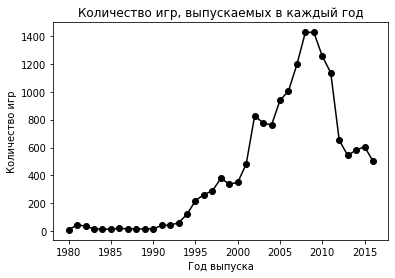

In [13]:
games_per_year = games.query('year_of_release > 0').pivot_table(index='year_of_release', values='name', aggfunc='count')
games_per_year.columns = ['number_of_games']
display(games_per_year.transpose())
plt.plot(games_per_year, color='black', marker='o')
plt.title('Количество игр, выпускаемых в каждый год')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

Итак, количество игр за весь рассматриваемый период времени сильно возросло. Однако, в последние 5 лет количество сильно отличается от предыдущих значений. Будем считать важными данные за 2012-2016 годы, остальные для нас будут не так актуальны.

### <a name="step3_2"></a>Изменения продаж по платформам

Найдём годовые продажи игр для каждой платформы, нарисуем их на одном графике, а затем отберём самые успешные из них.

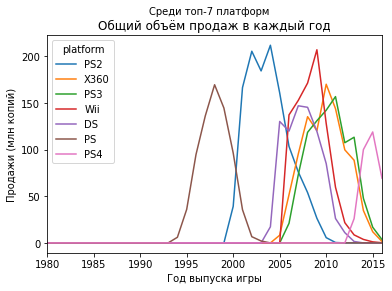

In [14]:
rev_platf_year = (games.query('year_of_release > 0')
                  .pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
                  .fillna(0))
rev_platf_year['total_rev'] = rev_platf_year.sum(axis=1)
rev_platf_year = (rev_platf_year
                  .sort_values(by='total_rev', ascending=False)
                  .drop(columns=['total_rev']))
rev_platf_year.head(7).transpose().plot()
plt.title('Общий объём продаж в каждый год')
plt.suptitle('Среди топ-7 платформ', fontsize=10)
plt.xlabel('Год выпуска игры')
plt.ylabel('Продажи (млн копий)')
plt.show()

Итак, мы построили распределение продаж по годам семи самых популярных платформ. Определим период сменяемости (устаревания) платформы. Сделаем это на примере линейки PlayStation (PS). Как мы видим, первая версия набирает популярность в 1993-м году. Затем, несмотря на то, что PS2 вышла в 1999, лишь в 2001 году она превосходит предыдущую модель. PS3 же обгоняет вторую версию платформы только в 2007-м году, появившись двумя годами ранее. Наконец, PS4 берёт лидерство в линейке в 2013 году, хоть и появилась она в 2011. Таким образом, в линейке модели появлялись в 1993, 1999, 2005 и 2011 году (а становятся лидерами двумя годами позже), значит, что характерный срок появления новых и исчезания старых платформ примерно равен 6 годам.

### <a name="step3_3"></a>Отбор данных за соответствующий актуальный период

В результате предыдущих исследований мы считаем актуальным периодом последние 5 лет (сменяемость платформ происходит раз в 6 лет, но более однородные данные по количеству игр имеются за последние 5 лет). Оставим лишь эти данные, они помогут построить прогноз на 2017 год.

In [15]:
act_games = games.query('year_of_release >= 2012')
print(len(act_games))

2886


Итак, теперь мы имеем будем делать прогноз лишь по 2886 записям в данных из первоначальных 16715. Но теперь у нас только актуальные данные.

### <a name=""></a>Лидирующие, растущие и падающие по продажам платформы

In [16]:
act_games['platform'].nunique()

11

Итак, всего имеется 11 платформ. Найдём среди них лидера по продажам за последние годы, а также те платформы, чьи продажи падают или растут.

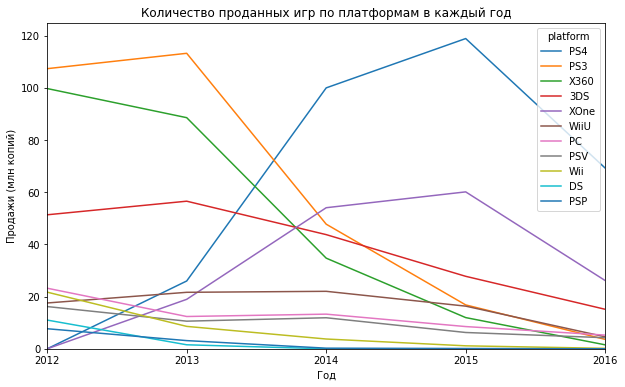

In [17]:
act_games_piv = (act_games
                  .pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
                  .fillna(0))
act_games_piv['total_rev'] = act_games_piv.sum(axis=1)
act_games_piv = (act_games_piv
                  .sort_values(by='total_rev', ascending=False)
                  .drop(columns=['total_rev']))
act_games_piv.transpose().plot(figsize=(10, 6), ylim=(0,125))
plt.title('Количество проданных игр по платформам в каждый год')
plt.xlabel('Год')
plt.xticks(range(2012, 2017))
plt.ylabel('Продажи (млн копий)')
plt.show()

In [18]:
act_games_piv['total_sales'] = act_games_piv.sum(axis=1)
display(act_games_piv)

year_of_release,2012,2013,2014,2015,2016,total_sales
platform,,,,,,
PS4,0.00,25.99,100.00,118.90,69.25,314.14
PS3,107.36,113.25,47.76,16.82,3.60,288.79
X360,99.74,88.58,34.74,11.96,1.52,236.54
3DS,51.36,56.57,43.76,27.78,15.14,194.61
XOne,0.00,18.96,54.07,60.14,26.15,159.32
WiiU,17.56,21.65,22.03,16.35,4.60,82.19
PC,23.22,12.38,13.28,8.52,5.25,62.65
PSV,16.19,10.59,11.90,6.25,4.25,49.18
Wii,21.71,8.59,3.75,1.14,0.18,35.37


Итак, лидером по продажам за последние годы является PS4 (PlayStation 4), следом за ней идут PS3 (PlayStation 3) и X360 (Xbox 360). Однако, продажи игр на PS3 и X360 неуклонно падают с 2013-го года, тогда как продажи на PS4 начали снижаться лишь в прошлом (2016) году. Это даёт основания считать PS4 потенциально прибыльной платформой в следующем году. То же происходит и с платформой XOne. Рост продаж игр на этой платформе наблюдался вплоть до 2015-го года. Таким образом, несмотря на вдвое меньшие суммарные продажи, XOne также можно считать перспективной и потенциально прибыльной платформой на будущий год. Наконец, несмотря на падение показателей, платформа 3DS имеет вполне неплохие продажи на фоне остальных. Её тоже включим в список перспективных платформ. Показатели остальных же платформ либо остаются на одном (невысоком) уровне, либо, что чаще, падают очень быстро.

### <a name="step3_5"></a>График «ящик с усами» по глобальным продажам игр в разбивке по платформам

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


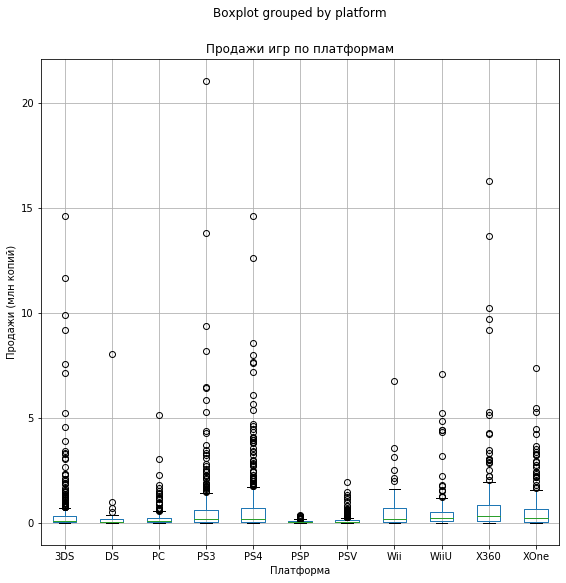

In [19]:
act_games.boxplot(column='total_sales', by='platform', figsize=(9, 9))
plt.title('Продажи игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи (млн копий)')
plt.show()

Итак, анализируя этот график, мы можем сказать, что большинство игр на каждой из платформ продаётся не очень хорошо. На всех платформах третий квартиль не превышает 1 млн проданных копий. То есть, на каждой из платформ более 75% игр не продаются в количестве миллиона копий. Основную "кассу" делают уникальные игры, поэтому мы видим огромное число выбросов в верхней части. Например, огромную прибыль принёс самый далёкий выброс — более 20 млн проданных копий — GTA V на PS3 (а всего — свыше 50 млн).

### <a name="step3_6"></a>Влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы

Теперь посмотрим, как влияют отзывы на продажи PS4 (лидера за последние годы). Для этого построим диаграмму рассеяния и подсчитаем корреляцию между отзывами и продажами.

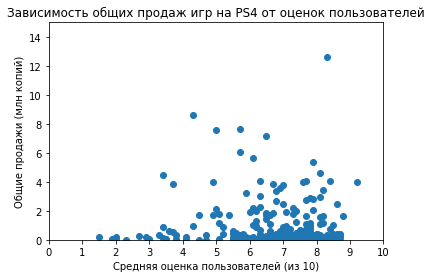

Корреляция между оценками пользователей и объёмами продаж игр на PS4 равна -0.03


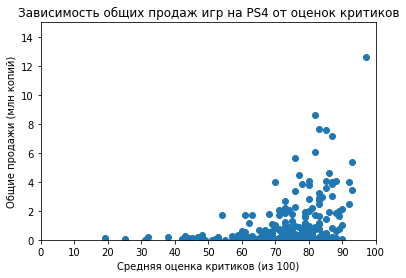

Корреляция между оценками критиков и объёмами продаж игр на PS4 равна 0.14


In [20]:
plt.scatter(act_games.query('platform == "PS4"')['user_score'], 
            act_games.query('platform == "PS4"')['total_sales'])
plt.xlim(0, 10)
plt.ylim(0, 15)
plt.xticks(range(0, 11))
plt.title('Зависимость общих продаж игр на PS4 от оценок пользователей')
plt.xlabel('Средняя оценка пользователей (из 10)')
plt.ylabel('Общие продажи (млн копий)')
plt.show()
print('Корреляция между оценками пользователей и объёмами продаж игр на PS4 равна', 
      round(act_games.query('platform == "PS4"')['user_score']
            .corr(act_games.query('platform == "PS4"')['total_sales']), 2))

plt.scatter(act_games.query('platform == "PS4" & critic_score > 0')['critic_score'], 
            act_games.query('platform == "PS4" & critic_score > 0')['total_sales'])
plt.xlim(0, 100)
plt.ylim(0, 15)
plt.xticks(range(0, 101, 10))
plt.title('Зависимость общих продаж игр на PS4 от оценок критиков')
plt.xlabel('Средняя оценка критиков (из 100)')
plt.ylabel('Общие продажи (млн копий)')
plt.show()
print('Корреляция между оценками критиков и объёмами продаж игр на PS4 равна', 
      round(act_games.query('platform == "PS4"')['critic_score']
            .corr(act_games.query('platform == "PS4"')['total_sales']), 2))

Итак, мы получили коэффициент корреляции между оценками пользователей и количеством продаж, равный -0.03, а ткже корреляцию оценок критиков и продаж, равный 0.14. На основании этих результатов мы можем судить о малой или почти отсутствующей корреляции между оценками пользователей и продажами. А также о том, что между оценками критиков и продажами корреляция есть (положительная), однако, не слишком высокая.

### <a name="step3_7"></a>Сравнение выводов с продажами игр на других платформах

Сравним эти характеристики и по другим платформам, помимо PS4, подсчитывая корреляции.

In [21]:
corrs = pd.DataFrame(columns=['platform', 'user_vs_sales', 'critic_vs_sales', 'num_users', 'num_critics'])
platforms = act_games_piv.index.tolist()
for platf in platforms:
    corrs = corrs.append({'platform' : platf,
                          'user_vs_sales' : act_games.query('platform == @platf')['user_score']
                                            .corr(act_games.query('platform == @platf')['total_sales']),
                          'critic_vs_sales' : act_games.query('platform == @platf')['critic_score']
                                              .corr(act_games.query('platform == @platf')['total_sales']),
                          'num_users' : len(act_games.query('platform == @platf & user_score.notnull()')),
                          'num_critics' : len(act_games.query('platform == @platf & critic_score > 0'))},
                         ignore_index=True)
display(corrs)

,platform,user_vs_sales,critic_vs_sales,num_users,num_critics
0,PS4,-0.031957,0.141595,257,252
1,PS3,-0.005144,0.233011,283,214
2,X360,0.006164,0.173295,235,171
3,3DS,0.197583,0.118704,114,104
4,XOne,-0.068925,0.180968,182,169
5,WiiU,0.400219,0.211754,100,90
6,PC,-0.121867,0.144881,206,198
7,PSV,-0.004339,0.389922,130,107
8,Wii,0.296197,0.550747,17,5
9,DS,0.882709,0.079326,3,1


Мы также вывели на экран количество оценок пользователей и критиков по каждой платформе. Это сделано для того, чтобы можно было судить об адекватности полученных значений. У нас для первых семи платформ не меньше 90 отзывов критиков и 100 отзывов пользователей, с таким объёмом данных уже можно больше доверять подсчитанной корреляции. Оказывается, что чаще всего оценки пользователей не коррелируют о продажами (кроме 3DS и WiiU, в которых чем выше оценка, тем больше продаж). Однако, если анализировать корреляцию продаж уже с оценками критиков, то мы видим прямую зависимость всегда, отличия лишь в уровне корреляции. Это вполне логично, критики лучше понимают рынок, поэтому их рецензии положительны, чаще всего, именно для более хороших и продаваемых игр.

### <a name="step3_8"></a>Общее распределение игр по жанрам

Теперь проанализируем то, как игры варьируются в зависимости от их жанра. Мы по-прежнему анализируем лишь игры, вышедшие за последние 5 лет, чтобы получить актуальные результаты.

In [22]:
genres_piv = act_games.pivot_table(index='genre', aggfunc={'total_sales' : ['sum', 'mean'],
                                              'name' : 'count'})
genres_piv.columns = ['num_of_games', 'sales_per_game', 'total_sales']
genres_piv.sort_values(by='total_sales', ascending=False)

,num_of_games,sales_per_game,total_sales
genre,,,
Action,1031,0.427856,441.12
Shooter,235,1.296723,304.73
Role-Playing,370,0.521081,192.80
Sports,268,0.675634,181.07
Misc,192,0.442917,85.04
Platform,85,0.717647,61.00
Racing,115,0.465217,53.50
Fighting,109,0.408165,44.49
Simulation,80,0.439000,35.12


Мы достаточно чётко можем выделить самые прибыльные жанры (как и жанры с самыми низкими продажами). Самыми прибыльными жанрами являются экшн, шутер, ролевые игры и спорт, они доминируют на рынке игр. Но и количество таких игр больше, чем в других жанрах. Стоит, однако, отдельно сказать о том, что в пересчёте на одну игру, жанр шутер является самым прибыльным, оставляя остальные жанры по этому показателю далеко позади. Это, как правило, динамичные игры, которые, очевидно, нравятся большинству пользователей. Жанр Platform, не являясь прибыльным в совокупности, показывает отличные результаты при пересчёте на одну игру. Наименее популярными и продаваемыми жанрами являются головоломки, стратегии и приключения. Более того, по показателю средних продаж одной игры, жанр приключения наименее продаваем (в два раза меньше, чем у второго места с конца списка).

## <a name="step4"></a>Шаг 4. Составьте портрет пользователя каждого региона

### <a name="step4_1"></a>Топ-5 самых популярных платформ

Итак, найдём 5 самых популярных платформ в регионах Северная Америка (NA), Европа (EU) и Япония (JP). Вместе с этим подсчитаем и доли платформ в общих продажах в регионе.

In [23]:
na_total_sales = act_games['na_sales'].sum()
eu_total_sales = act_games['eu_sales'].sum()
jp_total_sales = act_games['jp_sales'].sum()

na_top_pl = (act_games
             .pivot_table(index='platform', values='na_sales', aggfunc='sum')
             .sort_values(by='na_sales', ascending=False)
             .head(5))
na_top_pl['na_sales_frac'] = na_top_pl['na_sales'] / na_total_sales
display(na_top_pl)

eu_top_pl = (act_games
             .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
             .sort_values(by='eu_sales', ascending=False)
             .head(5))
eu_top_pl['eu_sales_frac'] = eu_top_pl['eu_sales'] / eu_total_sales
display(eu_top_pl)

jp_top_pl = (act_games
             .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
             .sort_values(by='jp_sales', ascending=False)
             .head(5))
jp_top_pl['jp_sales_frac'] = jp_top_pl['jp_sales'] / jp_total_sales
display(jp_top_pl)

,na_sales,na_sales_frac
platform,,
X360,140.05,0.236983
PS4,108.74,0.184003
PS3,103.38,0.174933
XOne,93.12,0.157571
3DS,55.31,0.093592


,eu_sales,eu_sales_frac
platform,,
PS4,141.09,0.278383
PS3,106.86,0.210844
X360,74.52,0.147034
XOne,51.59,0.101792
3DS,42.64,0.084132


,jp_sales,jp_sales_frac
platform,,
3DS,87.79,0.455862
PS3,35.29,0.183249
PSV,21.04,0.109253
PS4,15.96,0.082875
WiiU,13.01,0.067556


Здесь мы видим различных лидером по дле продаж в зависимости от региона. Вполне объяснимо первенство X360 на рынке Северной Америки (доля 23.7% против 14.7% в Европе и отсутствия в топ-5 в Японии), ведь Xbox — это "детище" американской компании Microsoft, у которой есть огромное влияние на континенте в игровой индустрии. Лидером в Европе является PS4 (27.8%), но хорошие позиции у платформы и в NA (18.4%, второе место). Доля PS4 в JP мала, но выше, чем у X360 (8.3%). Что касается лидера продаж в Японии, то ситуация здесь кардинально другая. Почти половины рынка в сфере на счету платформы Nintendo 3DS (45.6%). Так же в топ-5 разные версии PlayStation, а также ещё одна из Nintendo (WiiU). Все эти платформы являются японскими. Вполне можно было ожидать огромной доли "родных" платформ в Японии, но зарубежные платформы даже близко не подбираются к вершине списка. 3DS же в Северной Америке и Европе имеет примерно равные доли (9.4% и 8.4% соответственно).

### <a name="step4_2"></a>Топ-5 самых популярных жанров

Теперь же перейдём к поиску 5 самых популярных жанров в тех же регионах. Снова подсчитаем и доли жанров в общих продажах в каждом из регионов.

In [24]:
na_top_gen = (act_games
             .pivot_table(index='genre', values='na_sales', aggfunc='sum')
             .sort_values(by='na_sales', ascending=False)
             .head(5))
na_top_gen['na_sales_frac'] = na_top_gen['na_sales'] / na_total_sales
display(na_top_gen)

eu_top_gen = (act_games
             .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
             .sort_values(by='eu_sales', ascending=False)
             .head(5))
eu_top_gen['eu_sales_frac'] = eu_top_gen['eu_sales'] / eu_total_sales
display(eu_top_gen)

jp_top_gen = (act_games
             .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
             .sort_values(by='jp_sales', ascending=False)
             .head(5))
jp_top_gen['jp_sales_frac'] = jp_top_gen['jp_sales'] / jp_total_sales
display(jp_top_gen)

,na_sales,na_sales_frac
genre,,
Action,177.84,0.300929
Shooter,144.77,0.244970
Sports,81.53,0.137960
Role-Playing,64.00,0.108297
Misc,38.19,0.064623


,eu_sales,eu_sales_frac
genre,,
Action,159.34,0.314392
Shooter,113.47,0.223886
Sports,69.09,0.136321
Role-Playing,48.53,0.095754
Racing,27.29,0.053846


,jp_sales,jp_sales_frac
genre,,
Role-Playing,65.44,0.339807
Action,52.80,0.274172
Misc,12.86,0.066777
Simulation,10.41,0.054055
Fighting,9.44,0.049019


Итак, при анализе полученных таблиц, можно сделать несколько выводов. В случае популярности жанров Северная Америка и Европа очень похожи: первые четыре места рейтинга точно совпадают (а доли близки между собой). Однако, в Японии мы наблюдаем интересную ситуацию. Здесь с долей в 34% лидируют ролевые игры, которые занимали лишь четвёртую позицию в других регионах (доля около 10%). Также на верхних позициях и такие жанры, как Fighting и Simulation. По всей видимости, такое различие получается из-за культурных особенностей региона (очень популярные игры с Покемонами, которые как раз находятся в категории ролевых игр).

### <a name="step4_3"></a>Влияние рейтинга ESRB на продажи

Теперь узнаем, как рейтинг ESRB влияет на продажи в каждом из регионов (и влияет ли вообще). Но чтобы узнать более полную картину, поймём, что означают сокращения в столбце рейтинга.

Итак, в столбце рейтинга (помимо пропущенных значений) имеется четыре уникальных значения: M, E, E10+ и T. 
- M (Mature) — для взрослых;
- E (Everyone)— для всех;
- E10+ (Everyone 10 and older) — для всех от 10 лет и старше;
- T (Teen) — для всех от 13 лет и старше.

In [25]:
na_total_sales = act_games.query('rating.notnull()')['na_sales'].sum()
eu_total_sales = act_games.query('rating.notnull()')['eu_sales'].sum()
jp_total_sales = act_games.query('rating.notnull()')['jp_sales'].sum()
# чтоб считать долю не от всех, а от всех, где есть рейтинг

na_rating = (act_games
             .pivot_table(index='rating', values='na_sales', aggfunc='sum')
             .sort_values(by='na_sales', ascending=False))
na_rating['na_sales_frac'] = na_rating['na_sales'] / na_total_sales
display(na_rating)

eu_rating = (act_games
             .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
             .sort_values(by='eu_sales', ascending=False))
eu_rating['eu_sales_frac'] = eu_rating['eu_sales'] / eu_total_sales
display(eu_rating)

jp_rating = (act_games
             .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
             .sort_values(by='jp_sales', ascending=False))
jp_rating['jp_sales_frac'] = jp_rating['jp_sales'] / jp_total_sales
display(jp_rating)

,na_sales,na_sales_frac
rating,,
M,231.57,0.474860
E,114.37,0.234528
E10+,75.70,0.155231
T,66.02,0.135381


,eu_sales,eu_sales_frac
rating,,
M,193.96,0.467013
E,113.03,0.272152
E10+,55.37,0.133319
T,52.96,0.127516


,jp_sales,jp_sales_frac
rating,,
E,28.33,0.338309
T,26.02,0.310724
M,21.20,0.253165
E10+,8.19,0.097803


Итак, смотря на таблицы с результатами, мы снова замечаем сильное сходство в регионах NA и EU. В них почти половина всех игр (для которых известен рейтинг) принадлежит рейтингу "для взрослых". В обоих регионах второе место (доля около 25%) занимает контент "для всех". В Японии же ситуация снова другая. Здесь почти 2/3 игр продаётся с рейтингом "13+ лет" и "для всех", а доля контента "для взрослых" составляет лишь четверть от всех продаж. Кажется, это снова связано со спецификой японской культуры и моды в сфере игр. Как мы видели, в Японии главенствует жанр ролевых игр, а шутеров нет и в пятерке лидеров по жанрам. Это сильно влияет и на полученные результаты в этом разделе. В регионе JP не особо предпочитают игры с элементами жестокости, в отличие от других регионов. Поэтому, мы можем сказать, что рейтинг действительно влияет на продажи в отдельно взятом регионе, однако именно жанр игры является первичным признаком таких различий.

## <a name="step5"></a>Шаг 5. Проверьте гипотезы

Прежде чем проверить статистические гипотезы, заранее зададим уровень значимости `alpha = 0.05`, далее будем использовать именно такой порог. 

### <a name="step5_1"></a>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

В данном случае нам нужно проверить гипотезу о равенстве двух средних. Это позволяет сделать t-тест (критерий Стьюдента). Нулевая гипотеза будет формулироваться как "средние пользовательские рейтинги платформ Xbox One и PC одинаковые", а альтернативная — "средние пользовательские рейтинги платформ Xbox One и PC различаются" (нам не важно, какое из средних окажется больше, поэтому тест будет двусторонним). Также важно помнить, что наблюдения в выборках независимы.

Создадим группы для дальнейшего анализа.

In [26]:
user_rat_xone = act_games.query('platform == "XOne" & user_score.notnull()')['user_score'].reset_index(drop=True)
user_rat_pc = act_games.query('platform == "PC" & user_score.notnull()')['user_score'].reset_index(drop=True)

Теперь можем переходить непосредственно к тестированию гипотезы.

In [27]:
alpha = 0.05
results_hyp1 = st.ttest_ind(user_rat_xone, user_rat_pc)
print('p-value:', results_hyp1.pvalue)
print('Среднее первой группы:', user_rat_xone.mean())
print('Среднее второй группы:', user_rat_pc.mean())
if results_hyp1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('НЕ отвергаем нулевую гипотезу')

p-value: 0.5535080500643661
Среднее первой группы: 6.521428571428572
Среднее второй группы: 6.4286407766990274
НЕ отвергаем нулевую гипотезу


Итак, тестирование гипотезы показало нам, что p-value намного больше уровня значимости. Такое различие средних в наших группах мы могли получить случайно с вероятностью более 55%. Таким образом, мы не можем отвергнуть гипотезу об их равенстве.

### <a name="step5_2"></a>Средние пользовательские рейтинги жанров Action и Sports разные

Перейдём к тестированию другой гипотезы. Здесь мы также должны проверить гипотезу на равенство средних в двух независимых группах. Снова будем использовать двусторонний (снова неважно, у какой группы среднее будет выше) t-тест. Нулевую гипотезу сформулируем как "средние пользовательские рейтинги жанров Action и Sports НЕ являются разными", а альтернативную — "средние пользовательские рейтинги жанров Action и Sports различаются".

Снова создадим группы для дальнейшего анализа, а затем тестируем и саму гипотезу.

In [28]:
user_rat_action = act_games.query('genre == "Action" & user_score.notnull()')['user_score'].reset_index(drop=True)
user_rat_sports = act_games.query('genre == "Sports" & user_score.notnull()')['user_score'].reset_index(drop=True)

In [29]:
alpha = 0.05
results_hyp2 = st.ttest_ind(user_rat_action, user_rat_sports)
print('p-value:', results_hyp2.pvalue)
print('Среднее первой группы:', user_rat_action.mean())
print('Среднее второй группы:', user_rat_sports.mean())
if results_hyp2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('НЕ отвергаем нулевую гипотезу')

p-value: 3.7163089460934874e-26
Среднее первой группы: 6.825047801147227
Среднее второй группы: 5.455897435897437
Отвергаем нулевую гипотезу


В этот раз тестирование гипотезы показало, что p-value уже намного меньше уровня значимости. Такие различия средних в наших группах мы, по сути, не могли получить случайно (вероятность почти 0%). Таким образом, мы отвергаем гипотезу о равенстве средних, то есть рейтинги действительно отличаются.

## <a name="step6"></a>Шаг 6. Напишите общий вывод

На основании результатов этого проекта мы можем сделать некоторые выводы по вопросам, которые ставились перед нами в самом начале.
1. Исходя из количества выпускаемых игр в каждый год, а также из динамики изменения продаж по платформам ежегодно, было выяснено, что характерный период устаревания игр и платформ — около 5 лет;
1. Самой прибыльной платформой последних лет является PS4, хотя и её продажи уже начинают снижаться;
1. На всех платформах большинство игр не продаются очень хорошо, основную "кассу" делают уникальные игры (например, GTA 5);
1. Чаще всего, отзывы пользователей не коррелируют с общими продажами, а вот отзывы критиков имеют небольшую положительную корреляцию с продажами игр, причём такая тенденция сохранятся для всех платформ (где есть достаточно данных для анализа);
1. Экшны, шутеры, ролевые игры и спортивные игры являются самыми прибыльными в сумме по всем рассматриваемым регионам;
1. Главные игровые платформы различаются в каждом регионе: в NA это X360, в EU — PS4, а в JP — 3DS. Это связано с тем, что эти платформы как раз созданы компаниями тот страны, в которой они являются лидерами;
1. Самые популярные жанры в Северной Америке и Европы совпадают (это снова экшны, шутеры, ролевые и спортивные игры), но в Японии ролевые игры занимают наивысшую позицию, в рейтинг самых популярных платформ там попадают также Simulation и Fighting;
1. Аналогичная ситуация с рейтингом ESRB: самыми популярными играми в NA и в EU являются игры с рейтингом "для взрослых", тогда как в Японии доля таких игр вдвое меньше, а лидером является рейтинг "для всех";
1. При проверки гипотезы было выяснено, что средние пользовательские рейтинги платформ Xbox One и PC не отличаются;
1. Также при проверке гипотезы было установлено, что средние пользовательские рейтинги жанров Action и Sports действительно разные.